# Chapter 1 - What makes CMDA work for my smartphone -- Distributed Power Control

## 1.1
Consider three pairs of transmitters and reciiers in a cell, with the following channel gain matrix G and noise of 0.1 mW for all the receivers. The target SIRs are also shown below.

\begin{equation}G=\begin{bmatrix}1&0.1&0.3\\0.2&1&0.3\\0.2&0.2&1\end{bmatrix}\end{equation}

\begin{equation}\gamma=\begin{bmatrix}1\\1.5\\1\end{bmatrix}\end{equation}

### a
With an initialization of all transmit powers at 1 mW, run DPC for ten iterations and plot the evalution of transmit powers and received SIRs.

### b
Adding a new pair of transmitters and receivers such that the new channel gain maitrix is:
\begin{equation}G=\begin{bmatrix}1&0.1&0.3&0.1\\0.2&1&0.3&0.1\\0.2&0.2&1&0.1\\0.1&0.1&0.1&1\end{bmatrix}\end{equation}


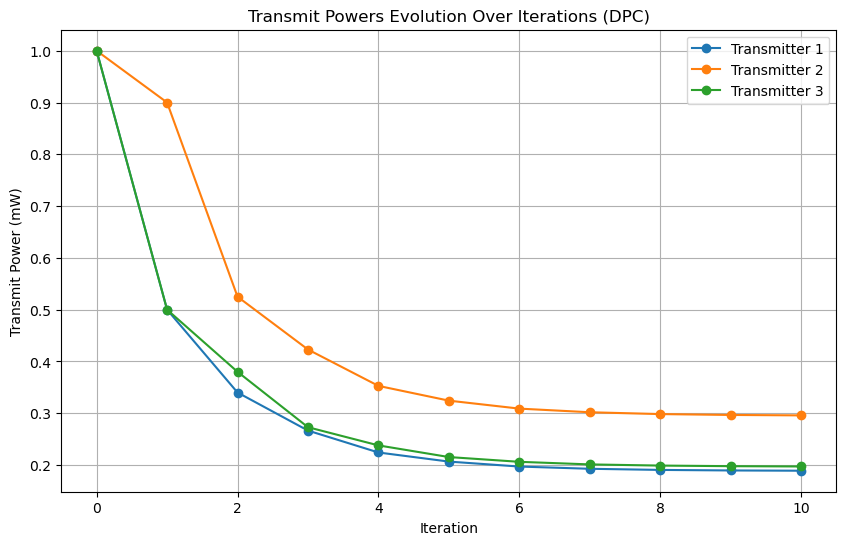

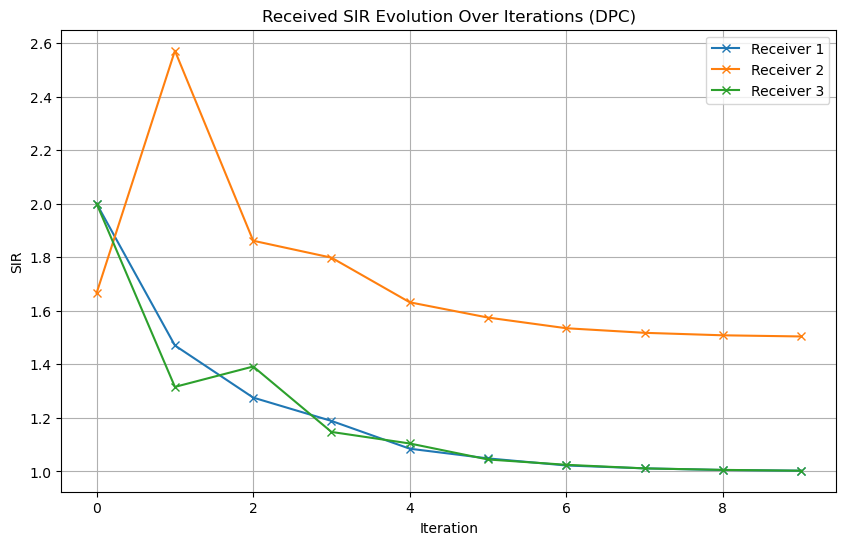

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Channel gain matrix G
G = np.array([[1, 0.1, 0.3],
              [0.2, 1, 0.3],
              [0.2, 0.2, 1]])

# Target SIRs
gamma_target = np.array([1, 1.5, 1])

# Noise power for all receivers (in mW)
noise_power = 0.1

# Initialize transmit powers (all at 1 mW)
P_init = np.array([1, 1, 1])

# Number of iterations for DPC
iterations = 10

# Arrays to store transmit powers and SIR values over iterations
P_vals = [P_init.copy()]
SIR_vals = []

# DPC Algorithm: Iterate 10 times
for _ in range(iterations):
    received_interference = G @ P_vals[-1] - np.diag(G) * P_vals[-1]  # Interference calculation
    SIR = np.diag(G) * P_vals[-1] / (received_interference + noise_power)  # Calculate current SIR
    SIR_vals.append(SIR)

    # Update transmit powers based on the DPC equation
    P_new = (gamma_target * (received_interference + noise_power)) / np.diag(G)
    P_vals.append(P_new)

# Convert lists to arrays for plotting
P_vals = np.array(P_vals)
SIR_vals = np.array(SIR_vals)

# Plot transmit powers over iterations
plt.figure(figsize=(10, 6))
plt.plot(P_vals, marker='o')
plt.title('Transmit Powers Evolution Over Iterations (DPC)')
plt.xlabel('Iteration')
plt.ylabel('Transmit Power (mW)')
plt.legend(['Transmitter 1', 'Transmitter 2', 'Transmitter 3'])
plt.grid(True)
plt.show()

# Plot received SIRs over iterations
plt.figure(figsize=(10, 6))
plt.plot(SIR_vals, marker='x')
plt.title('Received SIR Evolution Over Iterations (DPC)')
plt.xlabel('Iteration')
plt.ylabel('SIR')
plt.legend(['Receiver 1', 'Receiver 2', 'Receiver 3'])
plt.grid(True)
plt.show()


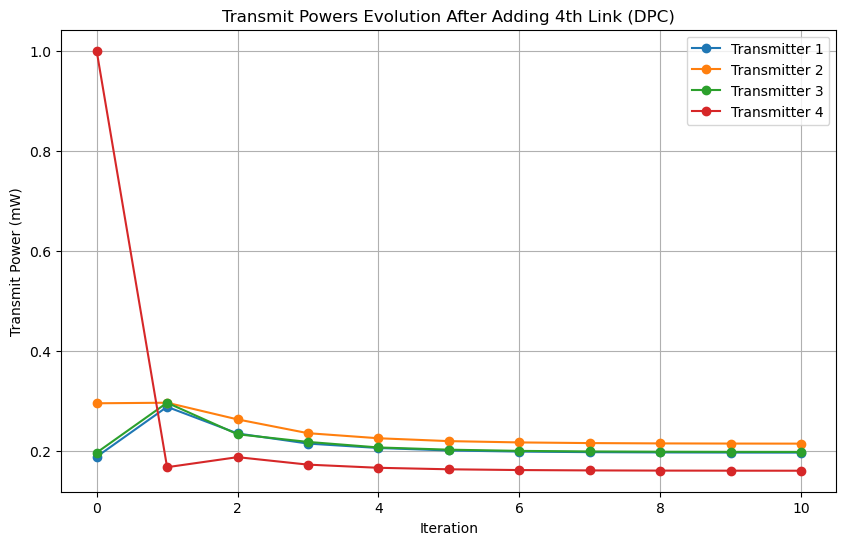

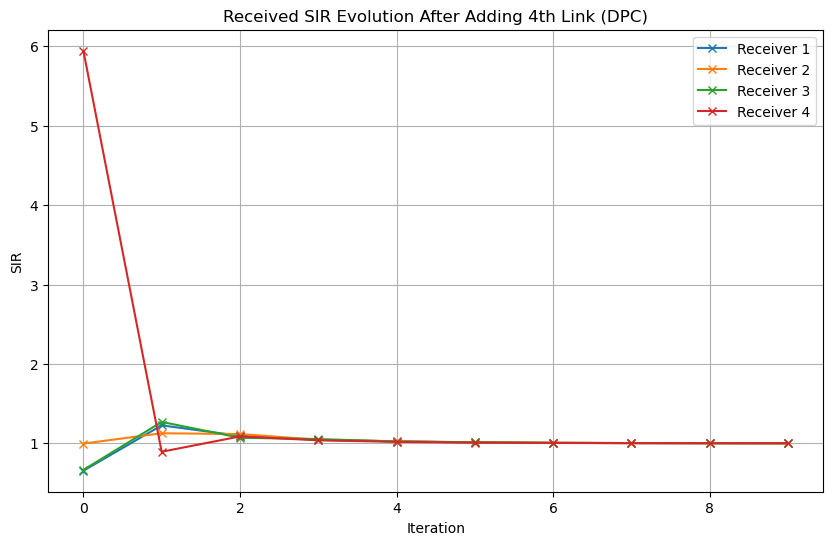

In [2]:
P_converged = np.array([P_vals[-1][0], P_vals[-1][1], P_vals[-1][2]])

# New G matrix with an additional transmitter-receiver pair
G_new = np.array([[1, 0.1, 0.3, 0.1],
                  [0.2, 1, 0.3, 0.1],
                  [0.2, 0.2, 1, 0.1],
                  [0.1, 0.1, 0.1, 1]])

# Updated target SIR vector, all set to 1
gamma_new = np.array([1, 1, 1, 1])

# Noise power for all receivers (in mW)
noise_power = 0.1

# Initialize transmit powers for 4 transmitters, starting from converged values for the first 3
P_init_extended = np.append(P_converged, [1])  # Adding 1 mW for the 4th transmitter

# Number of iterations for DPC after adding the new link
iterations_extended = 10

# Arrays to store new transmit powers and SIR values over iterations
P_vals_extended = [P_init_extended.copy()]
SIR_vals_extended = []

# DPC Algorithm: Iterate 10 times for the extended system
for _ in range(iterations_extended):
    received_interference_extended = G_new @ P_vals_extended[-1] - np.diag(G_new) * P_vals_extended[-1]
    SIR_extended = np.diag(G_new) * P_vals_extended[-1] / (received_interference_extended + noise_power)
    SIR_vals_extended.append(SIR_extended)

    # Update transmit powers based on the DPC equation
    P_new_extended = (gamma_new * (received_interference_extended + noise_power)) / np.diag(G_new)
    P_vals_extended.append(P_new_extended)

# Convert lists to arrays for plotting
P_vals_extended = np.array(P_vals_extended)
SIR_vals_extended = np.array(SIR_vals_extended)

# Plot transmit powers for the extended system over iterations
plt.figure(figsize=(10, 6))
plt.plot(P_vals_extended, marker='o')
plt.title('Transmit Powers Evolution After Adding 4th Link (DPC)')
plt.xlabel('Iteration')
plt.ylabel('Transmit Power (mW)')
plt.legend(['Transmitter 1', 'Transmitter 2', 'Transmitter 3', 'Transmitter 4'])
plt.grid(True)
plt.show()

# Plot received SIRs for the extended system over iterations
plt.figure(figsize=(10, 6))
plt.plot(SIR_vals_extended, marker='x')
plt.title('Received SIR Evolution After Adding 4th Link (DPC)')
plt.xlabel('Iteration')
plt.ylabel('SIR')
plt.legend(['Receiver 1', 'Receiver 2', 'Receiver 3', 'Receiver 4'])
plt.grid(True)
plt.show()

# Ch4 - How does Netflix recommend movies? -- Linear Regression, Machine Learning

In [ ]:
P_converged = np.array([P_vals[-1][0], P_vals[-1][1], P_vals[-1][2]])

# New G matrix with an additional transmitter-receiver pair
G_new = np.array([[1, 0.1, 0.3, 0.1],
                  [0.2, 1, 0.3, 0.1],
                  [0.2, 0.2, 1, 0.1],
                  [0.1, 0.1, 0.1, 1]])

# Updated target SIR vector, all set to 1
gamma_new = np.array([1, 1, 1, 1])

# Noise power for all receivers (in mW)
noise_power = 0.1

# Initialize transmit powers for 4 transmitters, starting from converged values for the first 3
P_init_extended = np.append(P_converged, [1])  # Adding 1 mW for the 4th transmitter

# Number of iterations for DPC after adding the new link
iterations_extended = 10

# Arrays to store new transmit powers and SIR values over iterations
P_vals_extended = [P_init_extended.copy()]
SIR_vals_extended = []

# DPC Algorithm: Iterate 10 times for the extended system
for _ in range(iterations_extended):
    received_interference_extended = G_new @ P_vals_extended[-1] - np.diag(G_new) * P_vals_extended[-1]
    SIR_extended = np.diag(G_new) * P_vals_extended[-1] / (received_interference_extended + noise_power)
    SIR_vals_extended.append(SIR_extended)
    
    # Update transmit powers based on the DPC equation
    P_new_extended = (gamma_new * (received_interference_extended + noise_power)) / np.diag(G_new)
    P_vals_extended.append(P_new_extended)

# Convert lists to arrays for plotting
P_vals_extended = np.array(P_vals_extended)
SIR_vals_extended = np.array(SIR_vals_extended)

# Plot transmit powers for the extended system over iterations
plt.figure(figsize=(10, 6))
plt.plot(P_vals_extended, marker='o')
plt.title('Transmit Powers Evolution After Adding 4th Link (DPC)')
plt.xlabel('Iteration')
plt.ylabel('Transmit Power (mW)')
plt.legend(['Transmitter 1', 'Transmitter 2', 'Transmitter 3', 'Transmitter 4'])
plt.grid(True)
plt.show()

# Plot received SIRs for the extended system over iterations
plt.figure(figsize=(10, 6))
plt.plot(SIR_vals_extended, marker='x')
plt.title('Received SIR Evolution After Adding 4th Link (DPC)')
plt.xlabel('Iteration')
plt.ylabel('SIR')
plt.legend(['Receiver 1', 'Receiver 2', 'Receiver 3', 'Receiver 4'])
plt.grid(True)
plt.show()

## 4.3

### a. 
Solve for $\vec{b}$ in the following least squares problem:
\begin{equation}
A = \begin{bmatrix}
1&0&2\\
1&1&0\\
0&2&1\\
2&1&1
\end{bmatrix}
\end{equation}
\begin{equation}
c = \begin{bmatrix}
2\\1\\1\\3
\end{bmatrix}
\end{equation}

### b. 
Solve the above least squares problem again with regularization. Vary the regularization parameter $\lambda$ for $\lambda=0,0.2,0.4,...,5.0$ and plot both $\|Ab-c\|^2_2$ and $\|b\|^2_2$ against $\lambda$ 

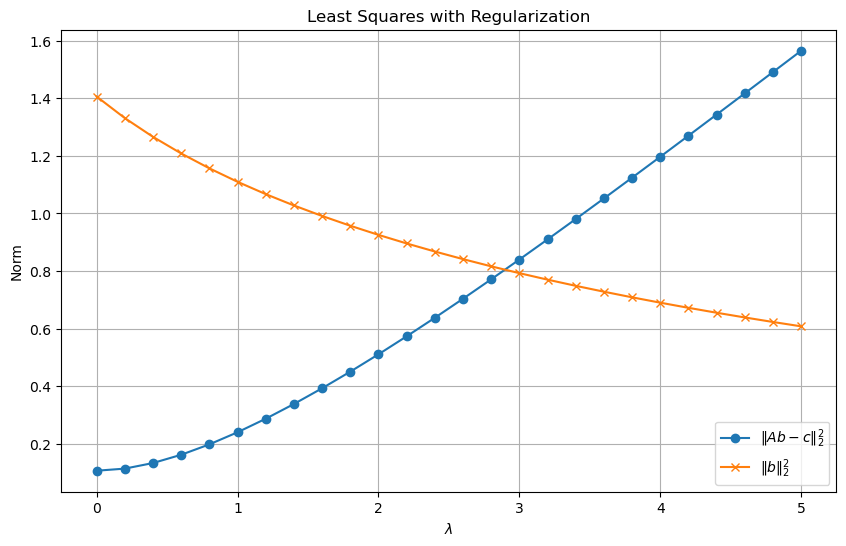

Least squares solution without regularization:  [1.03571429 0.21428571 0.53571429]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define matrix A and vector c
A = np.array([[1, 0, 2],
              [1, 1, 0],
              [0, 2, 1],
              [2, 1, 1]])

c = np.array([2, 1, 1, 3])

# Part a: Solve the least squares problem without regularization
b_ls, _, _, _ = np.linalg.lstsq(A, c, rcond=None)

# Part b: Solve the least squares problem with regularization for varying lambda
lambdas = np.arange(0, 5.2, 0.2)
b_norms = []
residuals = []

for lam in lambdas:
    # Solve the regularized least squares problem: (A^T A + λI) b = A^T c
    I = np.eye(A.shape[1])
    b_reg = np.linalg.inv(A.T @ A + lam * I) @ A.T @ c

    # Calculate the residual norm ||Ab - c||^2_2 and b norm ||b||^2_2
    residual = np.linalg.norm(A @ b_reg - c)**2
    b_norm = np.linalg.norm(b_reg)**2

    residuals.append(residual)
    b_norms.append(b_norm)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(lambdas, residuals, label=r'$\|Ab - c\|^2_2$', marker='o')
plt.plot(lambdas, b_norms, label=r'$\|b\|^2_2$', marker='x')
plt.title('Least Squares with Regularization')
plt.xlabel(r'$\lambda$')
plt.ylabel('Norm')
plt.legend()
plt.grid(True)
plt.show()

# Display the least squares solution without regularization
print("Least squares solution without regularization: ", b_ls)


## 4.4
Determine whether the following functions are convex, concave, both or neither.
### a.
$$f(x) = 3x + 4$$
### b.
$$f(x)=4ln(x/3)$$
### c.
$$f(x)=e^{2x}$$
### d.
$$f(x,y) = -3x^2 - 4y^2$$
### e.
$$f(x,y)=xy$$

## 4.5
### a.
$$exp(x+y)$$
### b.
$$exp(x+y)+exp(2x+5y)$$
### c.
$$log(exp(x+y)+exp(2x+5y))$$
### d.
minimise $xy+xz$
subject to $$x^2yz + xz^{-1} \leq 10$$$$0.5x^{-0.5}y^{-1}$$